# **DATA EXPLORATION AND VISUALIZATION**

In [7]:
#import libraries
import pandas as pd
import ast
from prettytable import PrettyTable

#data visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

#NLP libraries
from nltk import FreqDist

In [19]:
#import cleaned data

def list_converter(text):
    #to revert list->str conversion from pd.read_csv
    return ast.literal_eval(text)


corpus = pd.read_csv('Data/corpus_v4.csv', converters ={'tokens':list_converter})

corpus.head()

,index,text_type,ID,year,long_text,clean_text,word_count,tokens
0,0,comment,gtfo2hl,2021,"*Cuntry roads, take me hoem*",cuntry roads hoem,3,"[cuntry, road, hoem]"
1,1,comment,gtfqkbv,2021,"That’s been there for several years, sent a pi...",years sent pic cuntry friend long time ago,8,"[year, send, pic, cuntry, friend, long, time, ..."
2,2,comment,gtfou07,2021,I am single and I have not traveled to any cun...,single traveled cuntry past year,5,"[single, travel, cuntry, past, year]"
3,3,comment,gtfrgpe,2021,What happens when you shop at dragon mart...,happens shop dragon mart,4,"[happen, shop, dragon, mart]"
4,5,comment,gthiiwi,2021,"That’s just absolutely hilarious, is this in t...",absolutely hilarious springs souk,4,"[absolutely, hilarious, spring, souk]"


In [20]:
#remove unwanted column
corpus = corpus.drop(columns = ['index'])

In [21]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117817 entries, 0 to 117816
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text_type   117817 non-null  object
 1   ID          117817 non-null  object
 2   year        117817 non-null  int64 
 3   long_text   117817 non-null  object
 4   clean_text  114636 non-null  object
 5   word_count  117817 non-null  int64 
 6   tokens      117817 non-null  object
dtypes: int64(2), object(5)
memory usage: 6.3+ MB


In [37]:
#check for words with repeated characters

unique_words = set(corpus['clean_text'].str.split("[^\w+]").explode().tolist())


unique_words
#highlight words it would autocorrect will change and get a list and make a customized lexicon library

{nan,
 'kababs',
 'islash',
 'fatness',
 'obstacle',
 'overpowers',
 'lowballer',
 'friendship',
 'matched',
 'stirred',
 'reciprocity',
 'overal',
 '4999',
 'drawings',
 'tariq',
 'yeesh',
 'bangladesh',
 'misinterpreted',
 'dg',
 'intensities',
 'spunk',
 'church',
 '883',
 'respect',
 'balloon',
 'bucketload',
 'recreational',
 'aucust',
 'willful',
 'misrepresenting',
 'wee',
 'yeni',
 'turkeys',
 'buses',
 'kamikazes',
 'neuro',
 'scaling',
 'monetarily',
 'playing',
 'puttin',
 'sarbath',
 'budging',
 'gotku',
 '781',
 'unease',
 'rotw',
 'heatup',
 'brobaganda',
 'worldwide',
 'dragging',
 '1542',
 'policybazar',
 'riddet',
 'loose',
 'surroundings',
 'waive',
 'confidentnobody6',
 '500b',
 'trade',
 'hawkers',
 '2355',
 'socializing',
 'exams',
 'influw',
 'nicknamed',
 'allahu',
 'peddled',
 'yaaal',
 'digesting',
 '3332',
 'intersection',
 'syncs',
 'casualties',
 'tge',
 'iman',
 'freelance',
 'djibouti',
 'terabyte',
 '102',
 'phobia',
 'morgatge',
 'ibsis',
 'downtrodden',

In [14]:
#default plot settings

pio.templates.default = "plotly_white"

import matplotlib as mpl

#do not display right and top spines
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

#mpl.rcParams.keys()

## **Number of Submissions/Comments per Year**

In [15]:
#data per year
# Count the number of posts for each year
year_counts = corpus['year'].value_counts().to_dict()

# Create a dictionary showing years and the number of posts for each year
posts_per_year = {year: count for year, count in year_counts.items()}

print(posts_per_year)

{2022: 34455, 2020: 28152, 2021: 26564, 2023: 25156, 2019: 3903, 2018: 1608, 2017: 1081, 2016: 747, 2015: 192, 2014: 134, 2013: 58, 2012: 10}


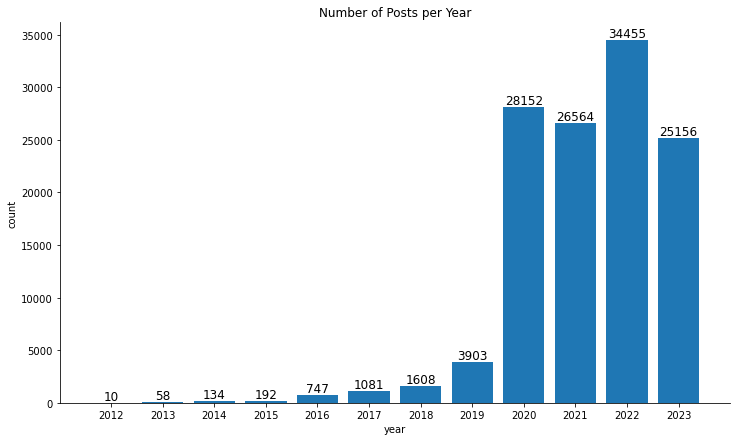

In [16]:
#dataframe holding years and number of posts made in each year
year = corpus['year'].value_counts().reset_index()
year.columns = ['year', 'count'] #rename column labels

#plot the number of posts per year
plt.figure(figsize=(12, 7))
plot = plt.bar(year['year'], year['count'])

plt.xticks(year['year']) #display all ticks
plt.xlabel('year')
plt.ylabel('count')
plt.title('Number of Posts per Year')

plt.bar_label(plot, fmt='%d', label_type='edge', fontsize=12)

plt.show()

### **Most Frequent Words**

In [17]:
token_list = corpus.tokens.to_list()
type(token_list[0])

list

In [18]:
#list of all words in the dataframe
all_words = [word for token_row in corpus['tokens'] for word in token_row]

#frequency of word occurrence
fdist = FreqDist(all_words)

common_words = fdist.most_common(20)

#table of common words **if you wish
common_words_table = PrettyTable(['word', 'count'])
for word, count in common_words:
    common_words_table.add_row([word, count])

print (common_words_table)

+---------+-------+
|   word  | count |
+---------+-------+
|    s    | 25820 |
|    t    | 19702 |
|  people | 14932 |
|   like  | 13865 |
|   not   | 13724 |
|  dubai  | 12762 |
|    m    |  9428 |
|   know  |  9338 |
|   good  |  8980 |
|   time  |  8371 |
|  think  |  8190 |
|   don   |  7824 |
|   work  |  7504 |
|    go   |  7041 |
|   year  |  6496 |
| country |  6491 |
|   uae   |  6235 |
|   need  |  6205 |
|   get   |  6177 |
|   want  |  6009 |
+---------+-------+
